In [1]:
from math import pi
import numpy as np
import sympy as sy
from sympy.utilities.lambdify import lambdify

In [2]:
import matplotlib.pyplot as plt

In [53]:
phi = sy.Symbol("phi")
_lambda = sy.Symbol("Lambda")
delta = sy.Symbol("delta")

R_x = sy.rot_axis1(phi).T
R_z = sy.rot_axis3(-_lambda).T
R_y = sy.rot_axis2(delta).T

In [54]:
vector = sy.Matrix([0,1,0])

final_vector = R_y * R_z * R_x * vector

planform_vector = sy.Matrix(final_vector)
planform_vector[-1] = 0

In [55]:
print(sy.latex(planform_vector, mul_symbol="\cdot"))

\left[\begin{matrix}\sin{\left(\Lambda \right)}\cdot\cos{\left(\delta \right)}\cdot\cos{\left(\phi \right)} + \sin{\left(\delta \right)}\cdot\sin{\left(\phi \right)}\\\cos{\left(\Lambda \right)}\cdot\cos{\left(\phi \right)}\\0\end{matrix}\right]


In [56]:
planform_vector

Matrix([
[sin(Lambda)*cos(delta)*cos(phi) + sin(delta)*sin(phi)],
[                                 cos(Lambda)*cos(phi)],
[                                                    0]])

In [57]:
sy.simplify((final_vector.T * u_planform_vector)[0])

((sin(Lambda)*cos(delta)*cos(phi) + sin(delta)*sin(phi))*(sin(phi) + cos(Lambda)*cos(phi))*sin(Lambda) + cos(Lambda)**2*cos(phi)**2)/cos(phi)

In [58]:
sy.simplify((planform_vector.T / sy.cos(phi) * final_vector)[0])

(sin(Lambda)*cos(delta)*cos(phi) + sin(delta)*sin(phi))**2/cos(phi) + cos(Lambda)**2*cos(phi)

In [59]:
print(sy.python(final_vector, ))

Lambda = Symbol('Lambda')
delta = Symbol('delta')
phi = Symbol('phi')
e = MutableDenseMatrix([[sin(Lambda)*cos(delta)*cos(phi) + sin(delta)*sin(phi)], [cos(Lambda)*cos(phi)], [-sin(Lambda)*sin(delta)*cos(phi) + sin(phi)*cos(delta)]])


In [60]:
final_vector

Matrix([
[ sin(Lambda)*cos(delta)*cos(phi) + sin(delta)*sin(phi)],
[                                  cos(Lambda)*cos(phi)],
[-sin(Lambda)*sin(delta)*cos(phi) + sin(phi)*cos(delta)]])

In [69]:
sy.simplify(final_vector.subs(delta, 0)[-1] / final_vector.subs(delta, 0)[0])

tan(phi)/sin(Lambda)

In [70]:
sy.tan(pi/2)

1.63312393531954e+16

In [67]:
final_vector[0]

sin(Lambda)*cos(delta)*cos(phi) + sin(delta)*sin(phi)

In [62]:
numerical_vector = lambdify((phi, _lambda, delta), final_vector)

Text(0.5, 0.92, 'Winglet LE and projections')

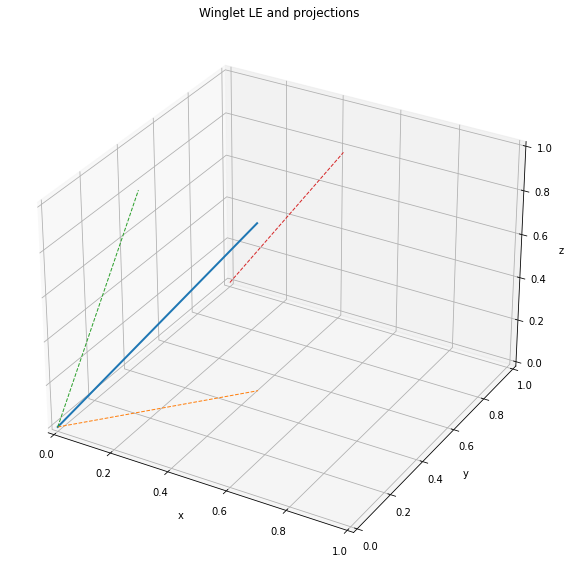

In [84]:
fig = plt.figure(figsize=(10,10))
axes = fig.add_subplot(111, projection='3d')

vec = numerical_vector(pi/3, pi/10, pi/10)

# Winglet LE
axes.plot([0, vec[0]], [0, vec[1]], [0, vec[2]], lw = 2.0)

# Plot projections
options_proj = dict(lw = 1.0, linestyle = '--')

axes.plot([0, vec[0]], [0, vec[1]], [0, 0], **options_proj)
axes.plot([0, 0], [0, vec[1]], [0, vec[2]], **options_proj)
axes.plot([0, vec[0]], [1, 1], [0, vec[2]], **options_proj)

axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_zlabel("z")

axes.set_xlim(xmin = 0.0, xmax = 1.0)
axes.set_ylim(ymin = 0.0, ymax = 1.0)
axes.set_zlim(zmin = 0.0, zmax = 1.0)
axes.set_title("Winglet LE and projections")

In [90]:
print(sy.latex(vector))

\left[\begin{matrix}0\\1\\0\end{matrix}\right]


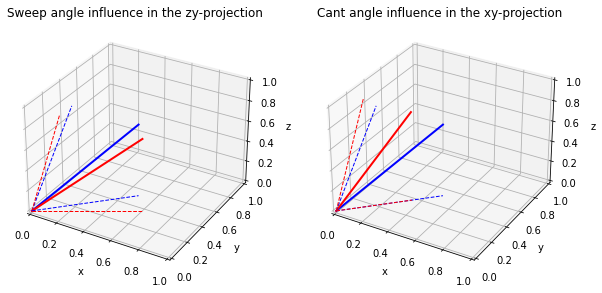

In [180]:
fig = plt.figure(figsize=(10,10))
axes = fig.add_subplot(121, projection='3d')

vec_1 = numerical_vector(pi/4, pi/4)
vec_2 = numerical_vector(pi/4, pi/3)

# Winglet LE
axes.plot([0, vec_1[0]], [0, vec_1[1]], [0, vec_1[2]], lw = 2.0, c = 'b')
axes.plot([0, vec_2[0]], [0, vec_2[1]], [0, vec_2[2]], lw = 2.0, c="r")

# Plot projections
options_proj = dict(lw = 1.0, linestyle = '--')

# Out of plane projection
axes.plot([0,0], [0, vec_1[1]], [0, vec_1[2]], **options_proj, c = 'b')
axes.plot([0,0], [0, vec_2[1]], [0, vec_2[2]], **options_proj, c = "r")

# In plane projection
axes.plot([0, vec_1[0]], [0, vec_1[1]], [0,0], **options_proj, c = 'b')
axes.plot([0, vec_2[0]], [0, vec_2[1]], [0,0], **options_proj, c = "r")

axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_zlabel("z")

axes.set_xlim(xmin = 0.0, xmax = 1.0)
axes.set_ylim(ymin = 0.0, ymax = 1.0)
axes.set_zlim(zmin = 0.0, zmax = 1.0)
axes.set_title("Sweep angle influence in the zy-projection")


axes = fig.add_subplot(122, projection='3d')
vec_1 = numerical_vector(pi/4, pi/4)
vec_2 = numerical_vector(pi/3, pi/4)

# Winglet LE
axes.plot([0, vec_1[0]], [0, vec_1[1]], [0, vec_1[2]], lw = 2.0, c = 'b')
axes.plot([0, vec_2[0]], [0, vec_2[1]], [0, vec_2[2]], lw = 2.0, c="r")

# Plot projections
options_proj = dict(lw = 1.0, linestyle = '--')

# Out of plane projection
axes.plot([0,0], [0, vec_1[1]], [0, vec_1[2]], **options_proj, c = 'b')
axes.plot([0,0], [0, vec_2[1]], [0, vec_2[2]], **options_proj, c = "r")

# In plane projection
axes.plot([0, vec_1[0]], [0, vec_1[1]], [0,0], **options_proj, c = 'b')
axes.plot([0, vec_2[0]], [0, vec_2[1]], [0,0], **options_proj, c = "r")

axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_zlabel("z")

axes.set_xlim(xmin = 0.0, xmax = 1.0)
axes.set_ylim(ymin = 0.0, ymax = 1.0)
axes.set_zlim(zmin = 0.0, zmax = 1.0)
axes.set_title("Cant angle influence in the xy-projection")

plt.savefig("sweep_cant_angle_projections.png", dpi = 300, bbox_inches="tight", transparent=True)